#### [**Home**](https://omteja04.github.io/3-2-Semester/)
## [**Download Jupyter File**](https://github.com/omteja04/3-2-Semester/blob/master/MLP-Lab/Programs.ipynb)

### Experiment-1: 
**Implement and demonstrate the _FIND-S_ algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.**

[**Kaggle link for dataset**](https://www.kaggle.com/datasets/mohitsinha4/enjoysport/data)

[**Download Dataset**](https://github.com/omteja04/3-2-Semester/blob/master/MLP-Lab/enjoy_sport.csv)

In [44]:
import pandas as pd  # Import pandas for reading CSV files

# Read the dataset
dataset = pd.read_csv("enjoy_sport.csv", header=None)

# Convert the dataset into a list of lists for easier processing
data = dataset.values.tolist()

# Print the dataset for reference
print("Dataset:")
print(dataset)

# Number of attributes in the dataset (excluding the target column)
num_attributes = len(data[0]) - 1 #6

# Initialize the hypothesis with the most specific values ('0')
hypothesis = ['0'] * num_attributes

print("\nInitial Hypothesis: ", hypothesis)
print("\nFind-S Algorithm Execution")

# Set the first positive example as the initial hypothesis
hypothesis = data[0][:-1]

# Iterate through the dataset
for index, example in enumerate(data):
    # If the target value is 'yes' (positive example)
    if example[num_attributes] == 'yes':
        # Update the hypothesis
        for attribute_index in range(num_attributes):
            if example[attribute_index] != hypothesis[attribute_index]:
                hypothesis[attribute_index] = '?'  # Generalize conflicting attributes
    # Print the hypothesis after processing each example
    print(f"Training Example No {index + 1}, Hypothesis: {hypothesis}")

# Output the final hypothesis
print("\nMaximally Specific Hypothesis: ", hypothesis)


Dataset:
       0     1       2       3     4       5    6
0  sunny  warm  normal  strong  warm    same  yes
1  sunny  warm    high  strong  warm    same  yes
2  rainy  cold    high  strong  warm  change   no
3  sunny  warm    high  strong  cool  change  yes

Initial Hypothesis:  ['0', '0', '0', '0', '0', '0']

Find-S Algorithm Execution
Training Example No 1, Hypothesis: ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
Training Example No 2, Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Training Example No 3, Hypothesis: ['sunny', 'warm', '?', 'strong', 'warm', 'same']
Training Example No 4, Hypothesis: ['sunny', 'warm', '?', 'strong', '?', '?']

Maximally Specific Hypothesis:  ['sunny', 'warm', '?', 'strong', '?', '?']


### Experiment-2: 
 
**For a given set of training data examples stored in a .CSV file, implement and demonstrate the _Candidate Elimination_ algorithm to output a description of the set of all hypotheses consistent with the raining examples.**

[**Kaggle link for dataset**](https://www.kaggle.com/datasets/mohitsinha4/enjoysport/data)

[**Download Dataset**](https://github.com/omteja04/3-2-Semester/blob/master/MLP-Lab/enjoy_sport.csv)

In [45]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('enjoy_sport.csv')

# Extract features (concepts) and labels (target)
features = np.array(data.iloc[:, 0:-1])  # All columns except the last one
labels = np.array(data.iloc[:, -1])      # The last column

def learn(features, labels):
    # Initialize the specific hypothesis with the first instance
    specific_hypothesis = features[0].copy()
    print("Initialization of Specific Hypothesis:")
    print(specific_hypothesis)

    # Initialize the general hypothesis as a set of all "?" (most general form)
    general_hypotheses = [["?" for _ in range(len(specific_hypothesis))] for _ in range(len(specific_hypothesis))]
    print("\nInitialization of General Hypotheses:")
    print(general_hypotheses)

    # Iterate over all examples
    for instance_idx, instance in enumerate(features):
        if labels[instance_idx] == "yes":  # Positive instance
            print(f"\nProcessing Positive Instance {instance_idx + 1}: {instance}")
            for feature_idx in range(len(specific_hypothesis)):
                if instance[feature_idx] != specific_hypothesis[feature_idx]:
                    specific_hypothesis[feature_idx] = '?'
                    general_hypotheses[feature_idx][feature_idx] = '?'

        elif labels[instance_idx] == "no":  # Negative instance
            print(f"\nProcessing Negative Instance {instance_idx + 1}: {instance}")
            for feature_idx in range(len(specific_hypothesis)):
                if instance[feature_idx] != specific_hypothesis[feature_idx]:
                    general_hypotheses[feature_idx][feature_idx] = specific_hypothesis[feature_idx]
                else:
                    general_hypotheses[feature_idx][feature_idx] = '?'

        print("\nUpdated Specific Hypothesis:")
        print(specific_hypothesis)
        print("\nUpdated General Hypotheses:")
        print(general_hypotheses)
        print("\n")

    # Remove redundant general hypotheses
    cleaned_general_hypotheses = [
        hypothesis for hypothesis in general_hypotheses
        if hypothesis != ['?' for _ in range(len(specific_hypothesis))]
    ]

    return specific_hypothesis, cleaned_general_hypotheses

# Run the algorithm
final_specific_hypothesis, final_general_hypotheses = learn(features, labels)

# Output results
print("\nFinal Specific Hypothesis:")
print(final_specific_hypothesis)

print("\nFinal General Hypotheses:")
print(final_general_hypotheses)

Initialization of Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Initialization of General Hypotheses:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Processing Positive Instance 1: ['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated General Hypotheses:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Processing Negative Instance 2: ['rainy' 'cold' 'high' 'strong' 'warm' 'change']

Updated Specific Hypothesis:
['sunny' 'warm' 'high' 'strong' 'warm' 'same']

Updated General Hypotheses:
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?'

### Experiment-3: 
**Write a program to demonstrate the working of the decision tree based _ID3_ algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**


In [46]:
import pandas as pd
import numpy as np

def entropy(col):
    values, counts = np.unique(col, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def information_gain(df, attribute, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[attribute], return_counts=True)
    weighted_entropy = sum((counts[i] / len(df)) * entropy(df[df[attribute] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

def find_best_attribute(df, target):
    return max(df.columns[:-1], key=lambda attr: information_gain(df, attr, target))

def build_tree(df):
    target = df.columns[-1]
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]
    if len(df.columns) == 1:
        return df[target].mode()[0]
    
    best_attr = find_best_attribute(df, target)
    tree = {best_attr: {}}
    for val in df[best_attr].unique():
        subtree = build_tree(df[df[best_attr] == val].drop(columns=[best_attr]))
        tree[best_attr][val] = subtree
    return tree

def classify(tree, test):
    if not isinstance(tree, dict):
        return tree
    attribute = next(iter(tree))
    return classify(tree[attribute].get(test.get(attribute), list(tree[attribute].values())[0]), test)

# Load dataset
df = pd.read_csv('playtennis.csv')

decision_tree = build_tree(df)
print("Decision Tree:", decision_tree)

# Test sample
test_sample = {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'Normal', 'Wind': 'Strong'}
print("Prediction:", classify(decision_tree, test_sample))

Decision Tree: {'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}
Prediction: Yes


### Experiment-4: 
**Exercises to solve the real-world problems using the following machine learning methods: a) Linear 
Regression b) Logistic Regression c) Binary Classifier**


#### Linear Regression

Feature (x):
 [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]] 

Target (y):
 [[4.11203136]
 [4.57580608]
 [4.28163052]
 [4.10193387]
 [3.89169592]
 [4.32515566]
 [4.02458233]
 [4.76303018]
 [4.95863229]
 [3.68147346]] 

Predicted Value for x=0.5: [[4.03919002]]


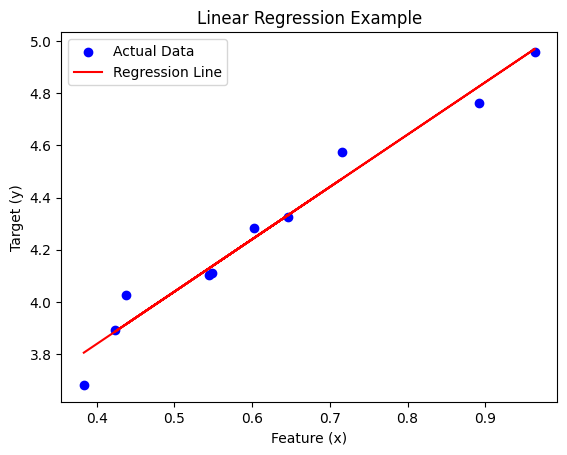

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data
x = np.random.rand(10, 1)  # Feature variable
y = 3 + 2*x + np.random.randn(10, 1)/10  # Linear relationship with noise

# Print dataset
print("Feature (x):\n", x, "\n")
print("Target (y):\n", y, "\n")

# Train Linear Regression model
model = LinearRegression()
model.fit(x, y)

# Predict for a new value
x_new = np.array([[0.5]])  # Corrected input format
y_pred = model.predict(x_new)

print("Predicted Value for x=0.5:", y_pred)

# Plot data points
plt.scatter(x, y, color='blue', label="Actual Data")

# Plot regression line
plt.plot(x, model.predict(x), color='red', label="Regression Line")

# Display the plot
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


#### Binary Classifier

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

# Generate synthetic binary classification data
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Convert to DataFrame for better visualization
df = pd.DataFrame(x, columns=[f"Feature_{i}" for i in range(1, 11)])
df["Target"] = y

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Model Accuracy: 0.7700
Mean Squared Error (MSE): 0.2300


### Experiment-14: 
**Write a program to Implement Support Vector Machines and Principle Component Analysis**


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

# **Load the Iris dataset**
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# **Split into Training (70%) & Testing (30%) sets**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Train the SVM model**
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# **Make predictions**
y_pred = svm_model.predict(X_test)

# **Evaluate the model**
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# **Print Classification Report**
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **Print Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Experiment: 
**DBSCAN**


Unique cluster labels found: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}


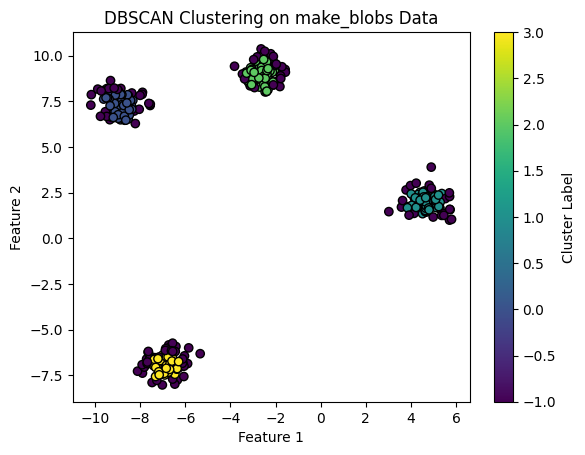

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.5, random_state=42)


# **Apply DBSCAN**
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

labels = dbscan.labels_

print(f"Unique cluster labels found: {set(labels)}")
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k", marker='o')
plt.colorbar(label="Cluster Label")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering on make_blobs Data")
plt.show()


### Experiment-12: 
**Exploratory data analysis for classification using Pandas or Matplotlib**
